C:\Users\angel\AppData\Local\Temp\ipykernel_8344\1514077496.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['amount'].fillna(X['amount'].median(), inplace=True)
C:\Users\angel\AppData\Local\Temp\ipykernel_8344\1514077496.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mode().iloc[0], inplace=True)  # For categorical columns


Logistic Regression Performance Metrics:
Accuracy: 0.8112477682999405
Precision: 0.639344262295082
Recall: 0.0203125
F1 Score: 0.039374053508329135
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Random Forest Performance Metrics:
Accuracy: 0.8106526482840706
Precision: 0.5310734463276836
Recall: 0.04895833333333333
F1 Score: 0.08965188364329994


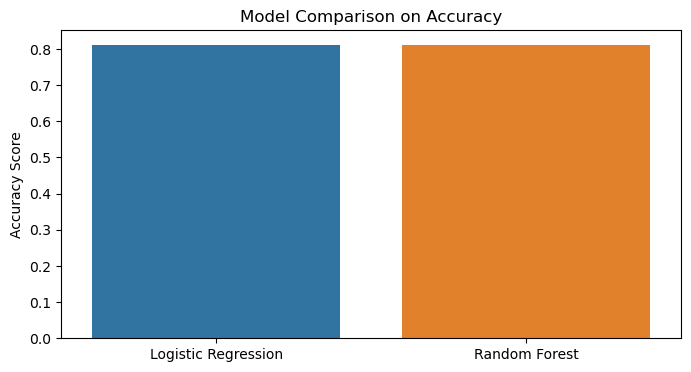

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_excel('Copy of PSP_Jan_Feb_2019.xlsx')

# Select specific features and the target variable
features = ['amount', 'PSP', 'country', 'card', '3D_secured']
X = data[features]
y = data['success']

# Fill missing values
X['amount'].fillna(X['amount'].median(), inplace=True)
X.fillna(X.mode().iloc[0], inplace=True)  # For categorical columns

# Define a column transformer to handle categorical variables and scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['amount']),
        ('cat', OneHotEncoder(), ['PSP', 'country', 'card', '3D_secured'])
    ])

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a preprocessing and modeling pipeline for logistic regression
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(max_iter=1000, random_state=42))])

# Fit the Logistic Regression pipeline
lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

# Evaluate the baseline model
print("Logistic Regression Performance Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))

# Random Forest Model within a pipeline
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))])

# Parameter grid for GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

# Grid search to find the best parameters
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Performance Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

# Visual comparison of model performance
models = ['Logistic Regression', 'Random Forest']
accuracy_scores = [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_rf)]

plt.figure(figsize=(8, 4))
sns.barplot(x=models, y=accuracy_scores)
plt.title('Model Comparison on Accuracy')
plt.ylabel('Accuracy Score')
plt.show()


# 2. Data Understanding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50410 entries, 0 to 50409
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  50410 non-null  int64         
 1   tmsp        50410 non-null  datetime64[ns]
 2   country     50410 non-null  object        
 3   amount      50410 non-null  int64         
 4   success     50410 non-null  int64         
 5   PSP         50410 non-null  object        
 6   3D_secured  50410 non-null  int64         
 7   card        50410 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 3.1+ MB
None
         Unnamed: 0        amount       success    3D_secured
count  50410.000000  50410.000000  50410.000000  50410.000000
mean   25204.500000    202.395715      0.202896      0.238266
std    14552.257872     96.274730      0.402160      0.426027
min        0.000000      6.000000      0.000000      0.000000
25%    12602.250000    133.0

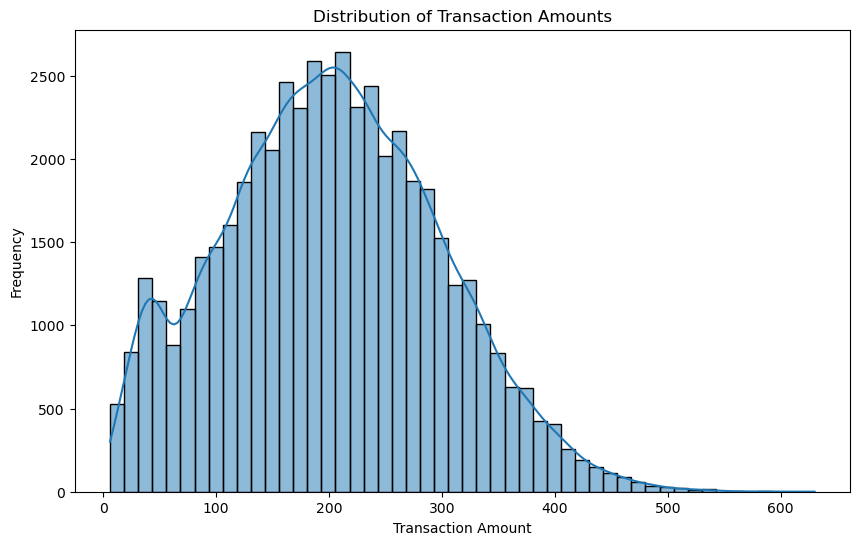

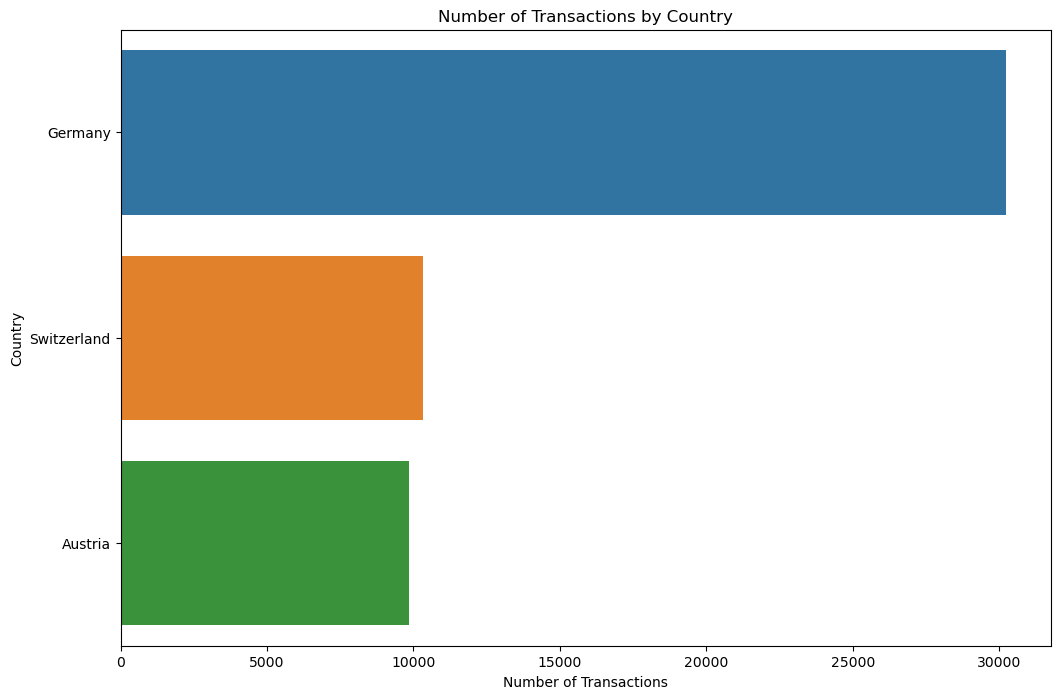

          PSP   success
0    Goldcard  0.406172
1   Moneycard  0.218754
2  Simplecard  0.158123
3     UK_Card  0.194338


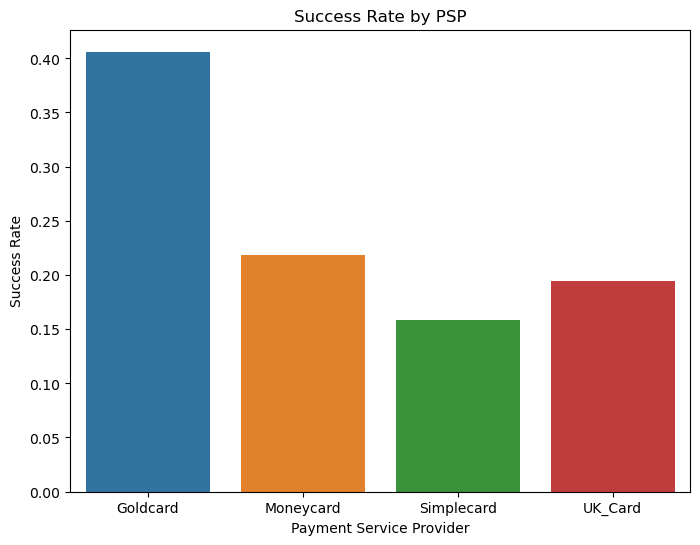

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_excel('Copy of PSP_Jan_Feb_2019.xlsx')

# Basic data information
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Visualize the distribution of the 'amount' feature
plt.figure(figsize=(10, 6))
sns.histplot(data['amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Check the distribution of transactions by country
plt.figure(figsize=(12, 8))
sns.countplot(y='country', data=data, order=data['country'].value_counts().index)
plt.title('Number of Transactions by Country')
plt.xlabel('Number of Transactions')
plt.ylabel('Country')
plt.show()

# Check the success rate by PSP
success_rate_by_psp = data.groupby('PSP')['success'].mean().reset_index()
print(success_rate_by_psp)

# Visualize the success rate by PSP
plt.figure(figsize=(8, 6))
sns.barplot(x='PSP', y='success', data=success_rate_by_psp)
plt.title('Success Rate by PSP')
plt.xlabel('Payment Service Provider')
plt.ylabel('Success Rate')
plt.show()

# 3. Data Preparation

In [33]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

# Convert 'tmsp' to datetime
data['tmsp'] = pd.to_datetime(data['tmsp'])

# Feature Engineering: Identify repeated attempts
data = data.sort_values(by=['country', 'amount', 'tmsp'])
data['time_diff'] = data.groupby(['country', 'amount'])['tmsp'].diff().dt.total_seconds()
data['is_retry'] = data['time_diff'].apply(lambda x: 1 if x <= 60 else 0).fillna(0)

# Encode categorical features
le_card = LabelEncoder()
data['card_encoded'] = le_card.fit_transform(data['card'])

le_psp = LabelEncoder()
data['psp_encoded'] = le_psp.fit_transform(data['PSP'])

le_country = LabelEncoder()
data['country_encoded'] = le_country.fit_transform(data['country'])

# Select relevant features
features = ['amount', '3D_secured', 'card_encoded', 'country_encoded', 'psp_encoded', 'is_retry']
X = data[features]
y = data['success']

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 4. Modelling

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Baseline Model: Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluate the baseline model
print('Baseline Model - Logistic Regression:')
print('Accuracy:', accuracy_score(y_test, y_pred_lr))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_lr))
print('Classification Report:\n', classification_report(y_test, y_pred_lr))

# Predictive Model: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate the predictive model
print('Predictive Model - Random Forest:')
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_rf))
print('Classification Report:\n', classification_report(y_test, y_pred_rf))


Baseline Model - Logistic Regression:
Accuracy: 0.7974608212656219
Confusion Matrix:
 [[8040    0]
 [2042    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      8040
           1       0.00      0.00      0.00      2042

    accuracy                           0.80     10082
   macro avg       0.40      0.50      0.44     10082
weighted avg       0.64      0.80      0.71     10082



C:\Users\angel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\angel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\angel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Predictive Model - Random Forest:
Accuracy: 0.734378099583416
Confusion Matrix:
 [[7054  986]
 [1692  350]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84      8040
           1       0.26      0.17      0.21      2042

    accuracy                           0.73     10082
   macro avg       0.53      0.52      0.52     10082
weighted avg       0.70      0.73      0.71     10082



# 5. Evaluation

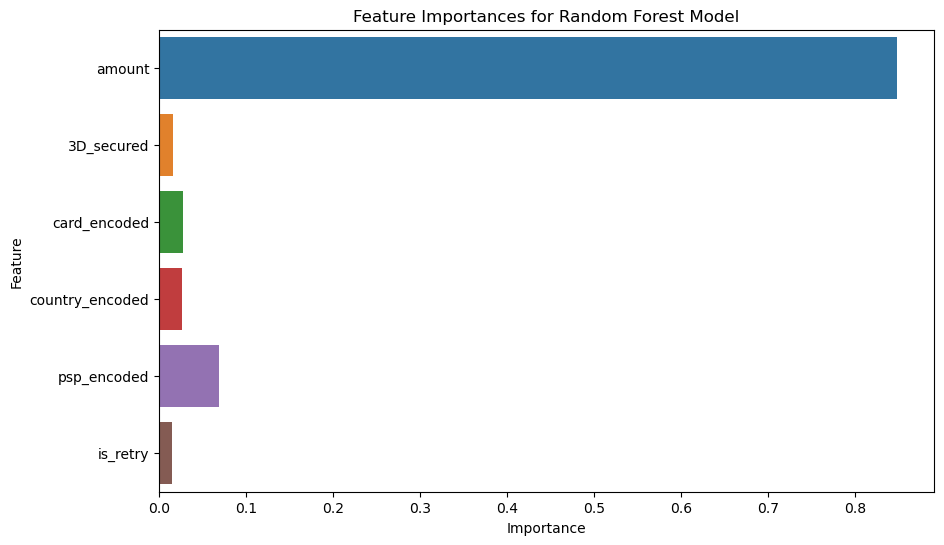

Error Analysis: Misclassified Transactions


AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [35]:
# Feature Importance for Random Forest
importances = rf_model.feature_importances_
feature_names = features

# Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importances for Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Error Analysis
errors = X_test[y_test != y_pred_rf]
print("Error Analysis: Misclassified Transactions")
print(errors.head())

Tuned Model - Random Forest:
Accuracy: 0.7993
Precision: 0.5772
Recall: 0.0348
F1-Score: 0.0656
AUC-ROC: 0.6567


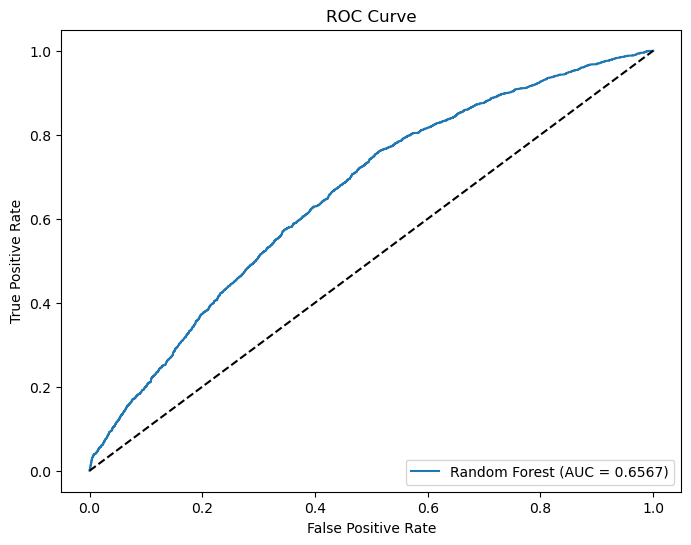

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Model performance metrics
accuracy = accuracy_score(y_test, y_pred_best_rf)
precision = precision_score(y_test, y_pred_best_rf)
recall = recall_score(y_test, y_pred_best_rf)
f1 = f1_score(y_test, y_pred_best_rf)
auc = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])

print('Tuned Model - Random Forest:')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'AUC-ROC: {auc:.4f}')

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, best_rf_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.4f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Best estimator
best_rf_model = grid_search.best_estimator_

# Predict using the tuned model
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the tuned model
print('Tuned Model - Random Forest:')
print('Accuracy:', accuracy_score(y_test, y_pred_best_rf))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_best_rf))
print('Classification Report:\n', classification_report(y_test, y_pred_best_rf))


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Model - Random Forest:
Accuracy: 0.7993453679825432
Confusion Matrix:
 [[7988   52]
 [1971   71]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.99      0.89      8040
           1       0.58      0.03      0.07      2042

    accuracy                           0.80     10082
   macro avg       0.69      0.51      0.48     10082
weighted avg       0.76      0.80      0.72     10082

